# Aprendendo cores com Self-Organizing Maps (SOM) 🎨

Você já pensou em utilizar uma rede neural para criar cores? Pois é, estamos dando mais um passo na evolução do conhecimento das redes neurais artificiais! Essa aula vamos aprender a criar uma rede não supervisionada, a Self-Organizing Maps (SOM)!

A rede Self-Organizing Maps funciona como uma rede de **mapa topológico**, onde os neurônios competem entre si para trazer o melhor resultado possível, por isso também é conhecido como aprendizado por competição.

Vamos analisar a imagem a seguir para compreender o funcionamento dessa rede:

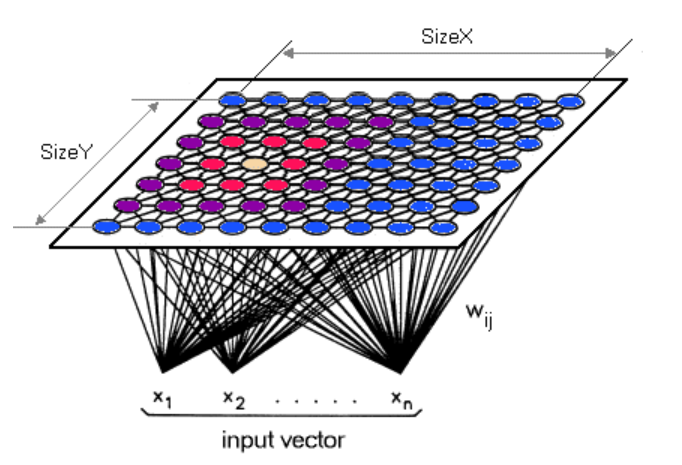

Cada um dos neurônios Xn de entrada da rede são atribuídos a pesos aleatórios em Wij. As cores desses neurônios representam um mapa topológico (podemos fazer a analogia com um mapa de cores, onde cada cor representa uma camada da rede neural), e em cada peso diferente entre as camadas é realizado uma competição na qual todos os neurônios calculam a função discriminante contendo características do dataset.

E o que seria a função discriminante?

Basicamente, é uma função matemática que é usada para separar ou discriminar entre diferentes classes ou grupos em um problema de classificação. O objetivo de uma função discriminante é atribuir uma instância de entrada a uma das várias classes ou categorias com base em suas características. Veja a função abaixo que representa a função discriminante.


A rede basicamente aprende o menor discriminante possível (também chamada de winner) na qual esse menor neurônio irá ativar os neurônios ao seu redor, e quanto mais distante os demais neurônios estiverem desse menor, mais complexo será para essa região de neurônios serem ativadas. Esse algoritmo é muito utilizado, por exemplo, para criar cores e absorver cores de imagens. Esse processo de ativação de neurônios é chamado de **vizinhança topológica**.

O algoritmo funciona da seguinte forma:

* 1° passo: Os pesos são inicializados.
* 2° passo: Um vetor é escolhido de forma aleatória do conjunto de dados.
* 3° passo: Cada neurônio é examinado para calcular os pesos e analisar quais neurônios são mais parecidos para criar a vizinhança, ou seja, estejam mais próximos com o neurônio winner (menor neurônio).
* 4° passo: Ao calcular a vizinhança, a quantidade de neurônios vai diminuindo com o decorrer do processamento da rede.
* 5° passo: O peso vencedor é compensado por ser mais próximo com o vetor de amostra. Os vizinhos de amostra também são atribuídos a semelhança dada a similaridade com o vetor de amostra (mapa topológico).
* 6° passo: A etapa 2 é repetida N vezes para N iterações do algoritmo.


A rede SOM é fascinante e poderosa no campo do aprendizado de máquina, podendo assim revelar padrões com eficiência, visualizar dados complexos e realizar tarefas de agrupamento sem a necessidade de conjuntos de dados rotulados. Podemos citar muitas aplicações dessa rede, tal como:

* Visualização de dados:  A rede auxilia na compreensão de dados complexos de alta dimensão, mapeando assim uma grade 2D.
* Clustering: A função de vizinhança basicamente funciona como uma tarefa de clustering, particionando dados em grupos semelhantes com base na similaridade.
* Feature Extraction e redução de dimensionalidade: Essa rede pode ser utilizada como uma etapa de pré-processamento de dados com o objetivo de reduzir a dimensionalidade e melhorar o desempenho dos algoritmos.
* Detecção de anomalias: Essa rede pode identificar anomalias ou valores discrepantes que se desviam significativamente das representações apreendidas.


Agora vamos codar?

A MiniSom é uma biblioteca Python que oferece uma implementação simplificada e fácil de usar de Redes Neurais de Mapas Auto-Organizáveis (SOMs). A MiniSom foi criada para ser uma versão minimalista e leve das SOMs, tornando-a adequada para tarefas simples de análise e visualização de dados.

Caso precise instalar a biblioteca MiniSom, realize o pip install abaixo.

O desafio da aula vai ser com base na amostra de uma imagem, a rede tem o desafio de aprender as cores e pintar a imagem novamente com as cores aprendidas.

In [65]:
#! pip install minisom

In [1]:
# Instalando as bibliotecas necessárias

from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Leitura da imagem
img = plt.imread('LooneyTunes.png')

# Reformulação da matriz de pixels
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

# SOM - Aumento do tamanho da rede para 20x20 com  três componentes de entrada (para as cores RGB) e ajuste dos hiperparâmetros

print('Treinamento...')
# sigma: controla o raio inicial de influência dos neurônios vizinhos durante o treinamento.
# neighborhood_function: determina como a influência dos neurônios vizinhos se propaga durante o treinamento (tente gaussian, bubble, mexican-hat)
som = MiniSom(20, 20, 3, sigma=2., learning_rate=0.1, neighborhood_function='bubble', topology ='hexagonal')
som.random_weights_init(pixels) # atribuindo o peso
starting_weights = som.get_weights().copy() # calculando função discriminante para cada peso da rede
som.train_random(pixels, 1000)  # Aumento das épocas de treinamento

print('Quantização...')
qnt = som.quantization(pixels)

print('Construindo a nova imagem...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):
    clustered[np.unravel_index(i, img.shape[:2])] = q
print('Concluído.')



Treinamento...
Quantização...


/Users/marcelocardoso/Documents/.venv/lib/python3.11/site-packages/minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


Construindo a nova imagem...
Concluído.


Vamos visualizar os resultados?
O código abaixo plota os resultados obtidos em cada etapa da rede até a versão da imagem reconstruída com as cores aprendidas.

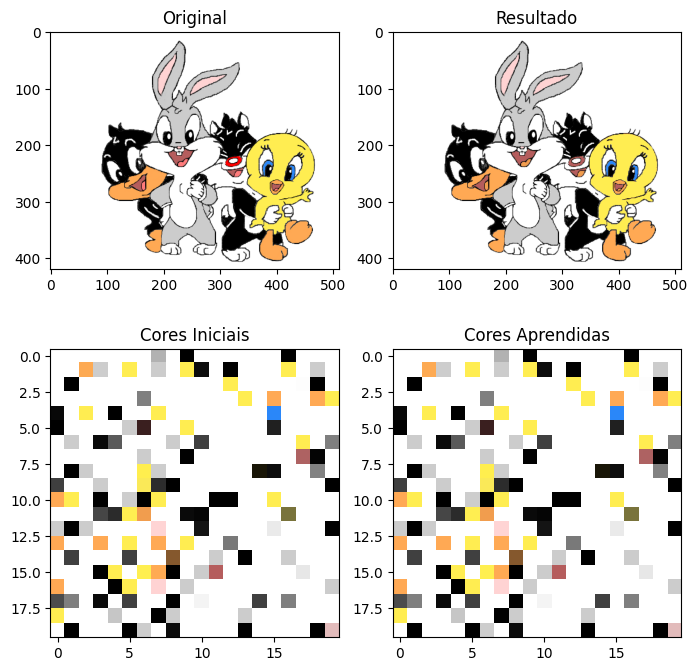

In [2]:
# Exibição do resultado
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Resultado')
plt.imshow(clustered)

plt.subplot(223)
plt.title('Cores Iniciais')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('Cores Aprendidas')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Ficou sensacional esse resultado não é mesmo? Que tal agora você realizar os seus próprios testes com imagens diferentes? Você pode brincar com os hiperparâmetros e construir sua própria SOM!  